# 1- Data Gathering

In [155]:
import pandas as pd
import numpy as np
import requests 
import json
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [156]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [157]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open (url.split('/')[-1] , mode = 'wb') as outfile:
    outfile.write(response.content)
    
images_df = pd.read_csv('image-predictions.tsv' , sep = '\t')  
images_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [158]:
tweet_df = pd.read_json('tweet-json.txt' , lines = True)
tweet_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# 2- Assessing Data

In [159]:
# show a summary of the archive_df dataset
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- the dataset have 2356 observations.
- 17 columns.
- no missing values.
- The data types of the variables are divided in 4 float, 2 integer and 10 object.

In [160]:
#show the statistical information
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [161]:
#show if there is any duplicated values
archive_df.duplicated().sum()

0

In [162]:
# find if there is any missing values in all columns
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Quality: 

- 1 Null values recorded as None and NaN(missing values).
- 2 tweet_id type is int64. 
- 3 convert timestamp to be datetime and rename the column to tweet_date.
- 4 source mixed html tag. 
- 5 some columns that contain unnecessary data we need to delete it.
    
    
    
Tidiness: 
- 1 Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 

# Step2: Assessing Data | images_df Dataset

In [163]:
 images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- The dataset have 2356 observations.
- 12 columns and with no missing values.
- The data types of the variables are divided in 3 float, 2 integer,3 boolean and 4 object.

In [164]:
#show the statistical information
images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [165]:
#show if there is any duplicated values
images_df.duplicated().sum()

0

In [166]:
# find if there is any missing values in all columns
images_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [167]:
images_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
sandbar                 1
loupe                   1
remote_control          1
Egyptian_cat            1
starfish                1
Name: p1, Length: 378, dtype: int64

In [168]:
images_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
brown_bear              1
rule                    1
dock                    1
hair_slide              1
tree_frog               1
Name: p2, Length: 405, dtype: int64

In [169]:
images_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
chickadee              1
canoe                  1
wombat                 1
acorn                  1
pot                    1
Name: p3, Length: 408, dtype: int64

Quality: 

- 1 tweet_id should be string.
- 2 The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters


Tidiness: 

- 1 extract breed of dog from columns p, p_conf and p_dog.

# Step2: Assessing Data | tweet_df Dataset

In [170]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

- The dataset have 2354 observations
- 31 columns and with no missing values.
- The data types of the variables are divided in 11 float, 4 integer,4 boolean, 1 datetime64 and 11 object.
- we have 179 tweets that are retweeted need to drop

In [171]:
# cheek null value in all columns
tweet_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

Quality: 
- 1 Missing values in some cloumns 
- 2 id column should be named 'tweet_id' as the others dataset, and the dtype should be string.
- 3 sourse data type should be category 
- 4 We have some columns that contain unnecessary data. 
- 5 source mixed html tag ,Rewrite the tweet source, from iphone ,web...etc


# 3- Cleaning Data | archive_df_copy

In [172]:
#Create a copy of archive_df dataframe
archive_df_copy = archive_df.copy()
archive_df_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


# Quality Issues:

## 1- Defin

chang coulmns datatype tweet_id, timestamp 

# 2- Code

In [173]:
#change coulmn tweet_id datatype to str
archive_df_copy['tweet_id'] = archive_df_copy['tweet_id'].astype(str)

In [174]:
#convert timestamp data type to datetime and rename the column into tweet_date
archive_df_copy.timestamp = pd.to_datetime(archive_df_copy['timestamp'])
archive_df_copy.rename(columns={"timestamp":'tweet_date'},inplace=True)

# 3-Test

In [175]:
print (archive_df_copy['tweet_id'].dtypes)

object


In [176]:
print (archive_df_copy['tweet_date'].dtypes)

datetime64[ns, UTC]


In [177]:
# test if timestamp changed to tweet_date
archive_df_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


# 1- Defin

drop unnessary columns 

# 2- Code

In [178]:
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','source','expanded_urls','rating_numerator','rating_denominator']
archive_df_copy.drop(drop_columns, axis=1,inplace = True)

# 3- Test

In [179]:
#test if coulmns dropped
archive_df_copy.head(3)

,tweet_id,tweet_date,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,Archie,None,None,None,None


# Tidiness Isuue

## 1- Defin

 Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 

# 2- code

In [180]:
# Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 
archive_df_copy['stages_of_dogs'] = archive_df_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [181]:
# Drop doggo, floofer, pupper, and puppo columns
archive_df_copy = archive_df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

# 3- Test

In [182]:
archive_df_copy['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

In [183]:
archive_df_copy.head(3)

,tweet_id,tweet_date,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,stages_of_dogs
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,Archie,NaN


# Step3: Cleaning Data | images_df Dataset 

In [184]:
#Create a copy of image_predictions dataframe 
images_df_copy = images_df.copy()
images_df_copy.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


# Quality Issues:

## 1-Defin

tweet_id  data type should be string 

## 2- Code

In [185]:
#chanage tweet_id data type to string
images_df_copy['tweet_id'] = images_df_copy['tweet_id'].astype('str')

## 3- Test

In [186]:
# test 
print(images_df_copy['tweet_id'].dtype)

object


## 1-Defin

The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters, change lowercase

## 2- Code

In [187]:
#The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters.
images_df_copy['p1'] = images_df_copy['p1'].str.lower()

In [188]:
images_df_copy['p2'] = images_df_copy['p2'].str.lower()

In [189]:
images_df_copy['p3'] = images_df_copy['p3'].str.lower()

## 3-Test

In [190]:
images_df_copy['p1'].head()

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [191]:
images_df_copy['p2'].head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [192]:
images_df_copy['p3'].head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

# Tidiness Issues :¶

## 1- Defin

extract breed of dog from columns p, p_conf and p_dog

## 2- Code

In [193]:
#extract dog breed 
def extr_dog(r):
        is_bread = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_bread = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_bread = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_bread = True
        if is_bread == False:
            return np.nan
        else:
            return name_br
images_df_copy['breed'] = images_df_copy.apply(extr_dog,axis=1)

In [194]:
drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
images_df_copy.drop(drop_columns, axis=1,inplace = True)

## 3-Test

In [195]:
images_df_copy.head(3)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,miniature_pinscher
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,malinois


In [196]:
images_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   breed     1708 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


# Step3: Cleaning Data | tweet_df dataset

In [197]:
#Create a copy of data_tweet dataframe 
tweet_df_copy = tweet_df.copy()
tweet_df_copy.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [198]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# Quality Issues:

## 1- Defin

change colum name 'd_str' to 'tweet_id' as the others dataset

## 2- Code

In [199]:
tweet_df_copy.rename(columns={'id_str':'tweet_id'},inplace=True)

## 3- Test

In [200]:
tweet_df_copy.head(3)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## 1- Defin

change tweet_id data type to object

## 2- Code

In [201]:
#change tweet_id data type to object
tweet_df_copy['tweet_id'] = tweet_df_copy['tweet_id'].astype('str')

## 3- Test

In [202]:
#test
print(tweet_df_copy['tweet_id'].dtype)

object


## 1- Defin

 change 'sourse' data type to category

## 2- Code

In [203]:
#change  source data dtype to category
tweet_df_copy['source'] = tweet_df_copy['source'].astype('category')


## 3- Test

In [204]:
#test 
print(tweet_df_copy['source'].dtype)

category


## 1- Defin

we have 179 tweets that are retweeted we need to drop it and drop the coulmns.

## 2- Code

In [205]:
(tweet_df_copy[tweet_df_copy['retweeted_status'].isna() != True])['id'].count()

179

## 3- Test

In [206]:
tweet_df_copy = tweet_df_copy[tweet_df_copy['retweeted_status'].isna()]

In [207]:
(tweet_df_copy[tweet_df_copy['retweeted_status'].isna() != True])['id'].count()

0

In [208]:
# drop the coulmns 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
archive_df_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

## 1- Defin

drop unnessary columns

## 2- Code

In [209]:
#Delete columns no needed
tweet_df_copy.drop(columns=['created_at','full_text','truncated','display_text_range','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)


## 3- Test

In [210]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              2175 non-null   int64   
 1   tweet_id        2175 non-null   object  
 2   source          2175 non-null   category
 3   retweet_count   2175 non-null   int64   
 4   favorite_count  2175 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 87.3+ KB


In [211]:
tweet_df_copy.isnull().sum()

id                0
tweet_id          0
source            0
retweet_count     0
favorite_count    0
dtype: int64

In [212]:
tweet_df_copy.head()

,id,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,892177421306343426,892177421306343424,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819
2,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461
3,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908
4,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048


## 1- Defin

source mixed html tag,Rewrite the tweet source, from iphone,..etc

## 2- Code

In [213]:
tweet_df_copy['source'] = tweet_df_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

<ipython-input-213-e8bd23ea21e9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df_copy['source'] = tweet_df_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


## 3- Test

In [214]:
tweet_df_copy['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [215]:
tweet_df_copy.head(2)

,id,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,Twitter for iPhone,8853,39467
1,892177421306343426,892177421306343424,Twitter for iPhone,6514,33819


# Gathering data  | merge all datasets

In [216]:
merge_df = pd.merge(archive_df_copy,tweet_df_copy , on='tweet_id' , how ='left')
merge_df.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0


In [217]:
merge_df = pd.merge(merge_df,images_df_copy,on='tweet_id',how='left')
merge_df.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer


In [218]:
#Create a copy 
merge_df_clean = merge_df.copy()

In [219]:
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1420 non-null   float64            
 6   source          1420 non-null   object             
 7   retweet_count   1420 non-null   float64            
 8   favorite_count  1420 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  img_num         2075 non-null   float64            
 11  breed           1708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 239.3+ KB


In [220]:
#cheack duplication
merge_df_clean.tweet_id.duplicated().sum()

0

In [221]:
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1420 non-null   float64            
 6   source          1420 non-null   object             
 7   retweet_count   1420 non-null   float64            
 8   favorite_count  1420 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  img_num         2075 non-null   float64            
 11  breed           1708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 239.3+ KB


In [222]:
merge_df_clean.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer


# Insight and observasions:

In [223]:
merge_df_clean.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer


In [224]:
merge_df_clean.describe()

,id,retweet_count,favorite_count,img_num
count,1.420000e+03,1420.000000,1420.000000,2075.000000
mean,7.341193e+17,2603.376761,8287.144366,1.203855
std,6.617821e+16,4049.137824,11141.534237,0.561875
min,6.660293e+17,2.000000,52.000000,1.000000
25%,6.757639e+17,578.500000,1786.750000,1.000000
50%,7.075988e+17,1311.000000,3903.000000,1.000000
75%,7.809896e+17,3103.750000,10280.000000,1.000000
max,8.918152e+17,56625.000000,107015.000000,4.000000


- The largest number of retweets is 56625
- and The favorite it is equal to 107015

# Storing data

In [225]:
merge_df_clean.to_csv('twitter_archive_master_.csv',index=False)

# Analyzing and Visualizing Data

## -1 what is the number of Tweets per month?

In [226]:
month_year = []

# using datetime method strftime to extract month and year
for i in merge_df_clean.index:
    month_year.append(merge_df_clean['tweet_date'][i].strftime("%m/%Y"))
month_year[0:5]

['08/2017', '08/2017', '07/2017', '07/2017', '07/2017']

In [227]:
# assign it to created_at list
merge_df_clean['created_at'] = month_year
merge_df_clean['created_at']

0       08/2017
1       08/2017
2       07/2017
3       07/2017
4       07/2017
         ...   
2351    11/2015
2352    11/2015
2353    11/2015
2354    11/2015
2355    11/2015
Name: created_at, Length: 2356, dtype: object

In [228]:
retweet_NUM= merge_df_clean['tweet_id'].groupby([merge_df['tweet_date'].dt.month, merge_df['tweet_date'].dt.year]).count()
retweet_NUM.head()

tweet_date  tweet_date
1           2016          194
            2017           94
2           2016          125
            2017           88
3           2016          137
Name: tweet_id, dtype: int64

Text(0.5, 1.0, 'number of Tweets per month')

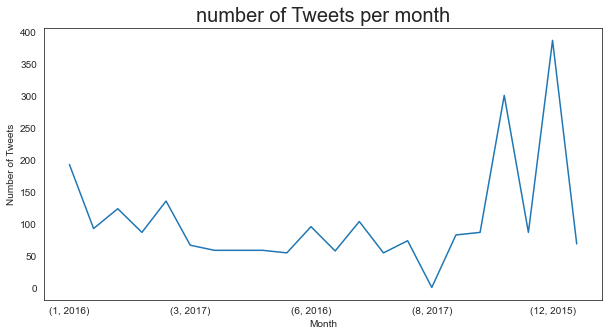

In [229]:
retweet_NUM.plot.line(figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('number of Tweets per month', size=20 )

## -2 What is the most used source?

<AxesSubplot:title={'center':'Sources of Tweet'}, xlabel='source', ylabel='count'>

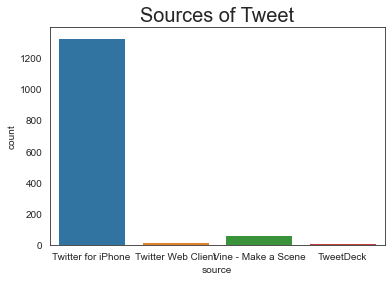

In [230]:
plt.title('Sources of Tweet', size=20)
sns.countplot(data=merge_df_clean, x='source')

## -3 what is the Top 3 frequent dog breed?

In [231]:
merge_df_clean['breed'].value_counts()[0:3].sort_values(ascending=False)

labrador_retriever    110
golden_retriever      103
cardigan               76
Name: breed, dtype: int64

Text(0.5, 1.0, 'Top 3 frequent dog breed')

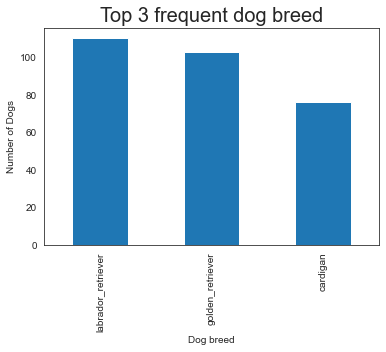

In [232]:
merge_df_clean['breed'].value_counts()[0:3].sort_values(ascending=False).plot(kind ='bar')
plt.ylabel('Number of Dogs')
plt.xlabel('Dog breed')
plt.title('Top 3 frequent dog breed', size=20)

## -4 What is the most stage of doges?

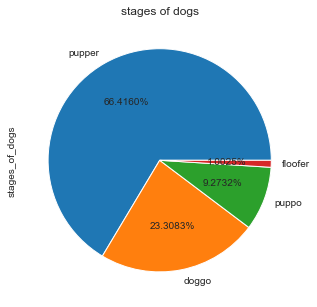

In [233]:
merge_df_clean.stages_of_dogs.value_counts().plot.pie(figsize=(5,6), autopct='%.4f%%')
plt.title('stages of dogs')
plt.show()

# -5 compare Between favorite counts & retweet counts ?

/Users/nadaabdullah/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<ipython-input-234-870f3a553b94>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('compare Between favorite counts & retweet counts ', Fontsize =11);


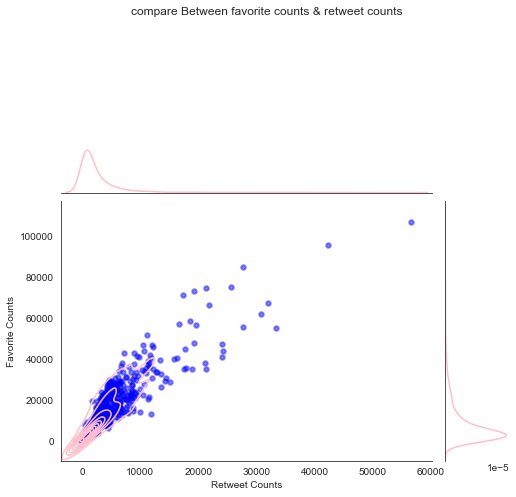

In [234]:
#Visualization
sns.set_style('white')
compare= sns.jointplot(data=merge_df_clean,x="retweet_count", y="favorite_count",kind="kde", color="pink", size=7)
compare.plot_joint(plt.scatter, marker=".",s=80,alpha=0.45, c="blue", linewidth=2)
compare.fig.subplots_adjust(top=0.7)
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.suptitle('compare Between favorite counts & retweet counts ', Fontsize =11);


# -6 what tweet have the highest favorites ?

In [235]:
highest_favorits = merge_df_clean['favorite_count'].sort_values(ascending = False).index[0]
merge_df_clean.loc[[highest_favorits]]

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed,created_at
534,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,Stephan,NaN,8.071068e+17,Twitter for iPhone,56625.0,107015.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,pomeranian,12/2016
